In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import matplotlib
matplotlib.rcParams[ 'font.family' ] = ‘batang’

font_name = 'BATANG'
font_path = 'C:/Windows/Fonts/batang.ttf'

SyntaxError: invalid character '‘' (U+2018) (2817315102.py, line 8)

In [2]:
eda_pj = pd.read_csv("./data/eda-proj-fc-purchase.csv")
eda_pj

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,-,289000,-


In [4]:
eda_pj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [17]:
# 실거래금액 월별 분석

# Clean the '거래일자' column
dates = eda_pj['거래일자'].str.replace("오전", "").str.replace("오후", "").str.replace(" ", "").str.replace(".", " ")

# Extract the month from the cleaned '거래일자' column
months = pd.to_datetime(dates, format='MM').dt.month

# Group the DataFrame by month and sum the '실거래금액' column
price_m = eda_pj.groupby(months)['실거래금액'].sum()


ValueError: time data "2022 12 31 10:12:33" doesn't match format "MM", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [21]:
import datetime

### 거래일자에서 오전, 오후, 빈칸, . 삭제
dates = eda_pj['거래일자'].str.replace("오전", "") 
dates = dates.str.replace("오후", "")
dates = dates.str.replace(" ", "")
dates = dates.str.replace(".", " ")

### 거래일자에서 월 만 추출하여 month에 저장
month = []
for i in range(len(dates)):
    redate = datetime.datetime.strptime(dates[i], '%Y %m %d %H:%M:%S')
    redate = redate.strftime('%m')
    month.append(redate)
    
month


['12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',

In [26]:
!pip install matplotlib

In [28]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc

mpl.rcParams.update(mpl.rcParamsDefault)


font_path = "C:\\Windows\\Fonts\\HANGUL.ttf"  # 궁서체의 실제 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# 데이터 불러오기
df = pd.read_csv('./data/eda-proj-fc-purchase.csv')

# '오전'과 '오후'를 'AM'과 'PM'으로 변환
df['거래일자'] = df['거래일자'].str.replace('오전', 'AM').str.replace('오후', 'PM')

# '년. 월. 일. 오전/오후 시:분:초' 형식의 '거래일자'를 datetime 형식으로 변환
df['거래일자'] = pd.to_datetime(df['거래일자'], format='%Y. %m. %d. %p %I:%M:%S')

# 월 정보 추가
df['월'] = df['거래일자'].dt.month

# 월별로 그룹화하고, 카테고리별로 카운트
grouped = df.groupby(['월', '카테고리']).size().reset_index(name='counts')

# 그래프 그리기
plt.figure(figsize=(15, 8))
sns.lineplot(data=grouped, x='월', y='counts', hue='카테고리')
plt.xticks(range(1, 13))
plt.title('월별 카테고리별 거래 수')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\HANGUL.ttf'

In [2]:
import pandas as pd

# Load data
df = pd.read_csv('./data/eda-proj-fc-purchase.csv')

# Convert '거래일자' column to datetime format
df['거래일자'] = pd.to_datetime(df['거래일자'], format='%Y. %m. %d. %p %I:%M:%S')

# Extract month and category information
df['월'] = df['거래일자'].dt.month
df['프로그래밍'] = df['카테고리'].str.split(' > ').str[0]
df['디자인'] = df['카테고리'].str.split(' > ').str[1]

# Group by month and category and calculate the total sales amount
grouped = df.groupby(['월', '프로그래밍', '디자인'])['실거래금액'].sum().reset_index(name='총실거래금액')

print(grouped.head())

SyntaxError: incomplete input (537866229.py, line 17)

In [3]:
!pip install seaborn

In [4]:
!pip install matplotlib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc

mpl.rcParams.update(mpl.rcParamsDefault)


# 데이터 불러오기
df = pd.read_csv('./data/eda-proj-fc-purchase.csv')

# '오전'과 '오후'를 'AM'과 'PM'으로 변환
df['거래일자'] = df['거래일자'].str.replace('오전', 'AM').str.replace('오후', 'PM')

# '년. 월. 일. 오전/오후 시:분:초' 형식의 '거래일자'를 datetime 형식으로 변환
df['거래일자'] = pd.to_datetime(df['거래일자'], format='%Y. %m. %d. %p %I:%M:%S')

# 월 정보 추가
df['월'] = df['거래일자'].dt.month

# 월별로 그룹화하고, 특정 카테고리(프로그래밍)로 카운트
grouped = df.groupby(['월', ' 카테고리']).size().reset_index(name='counts')

# 그래프 그리기
plt.figure(figsize=(15, 8))
sns.lineplot(data=grouped, x='월', y='counts', hue='카테고리')
plt.xticks(range(1, 13))
plt.title('월별 카테고리 거래 수')
plt.show()

KeyError: ' 프로그래밍'

C:\Users\user\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48141 (\N{HANGUL SYLLABLE MING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\

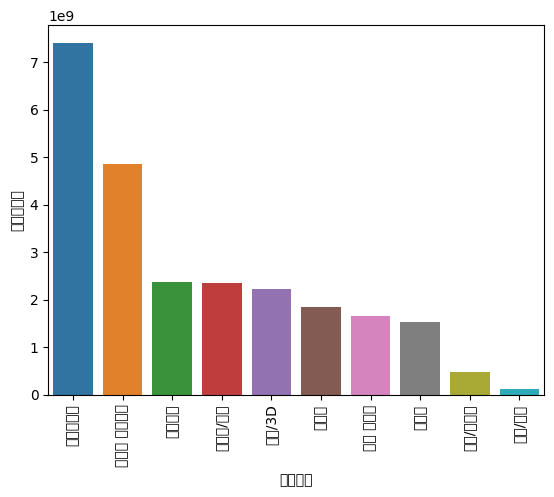

In [16]:
# 카테고리별 총 거래금액

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df = eda_pj =  pd.read_csv('./data/eda-proj-fc-purchase.csv')


# 카테고리 실거래금액 Dataframe 생성
price_s = eda_pj[['카테고리', '실거래금액']]

# 실거래금액 값이 0 초과인것만 선택
s_price = price_s[price_s['실거래금액'] > 0]

# 카테고리별 실거래금액의 총합을 계산
s_price = s_price.groupby('카테고리')['실거래금액'].sum().reset_index()

# 실거래금액의 내림차순으로 정령
s_price = s_price.sort_values('실거래금액', ascending=False)

# 카테고리 별 실거래금액 총합 시각화

# Set the font name and path
font_name = 'BATANG'
font_path = 'C:/WINDOWS/FONTS/BATANG.ttc'
font_prop = fm.FontProperties(fname=font_path, size=12)

sns.barplot(x='카테고리', y='실거래금액', data=s_price)
plt.xticks(rotation=90)
ax.set_title("카테고리 별 거래금액 총액", fontproperties=font_prop)
ax.set_xlabel("카테고리", fontproperties=font_prop)
ax.set_ylabel("거래금액 총액", fontproperties=font_prop)

plt.show()